<a href="https://colab.research.google.com/github/jfernandez37/495Project/blob/main/Directed_consulting_495.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to fao data: https://www.fao.org/faostat/en/#data

Better fao data: https://www.fao.org/faostat/en/#data/TM

In [62]:
import pandas as pd
import numpy as np
import scipy.io as sio
import plotly
import collections
import math
import matplotlib.pyplot as plt

In [63]:
data=sio.loadmat("iFarmData(2015)_1_28_2019.mat")

In [64]:
comparison=pd.read_csv("FAOSTAT_data_4-4-2022.csv")
orgComp=comparison.sort_values(['Value'], ascending=False)
expComp=orgComp.loc[orgComp['Element']=="Export Quantity"]
impComp=orgComp.loc[orgComp['Element']=="Import Quantity"]

In [65]:
print(comparison)

    Domain Code                 Domain  Reporter Country Code (FAO)  \
0            TM  Detailed trade matrix                          231   
1            TM  Detailed trade matrix                          231   
2            TM  Detailed trade matrix                          231   
3            TM  Detailed trade matrix                          231   
4            TM  Detailed trade matrix                          231   
..          ...                    ...                          ...   
571          TM  Detailed trade matrix                          231   
572          TM  Detailed trade matrix                          231   
573          TM  Detailed trade matrix                          231   
574          TM  Detailed trade matrix                          231   
575          TM  Detailed trade matrix                          231   

           Reporter Countries  Partner Country Code (FAO) Partner Countries  \
0    United States of America                         138           

In [66]:
printParam=['Item','Value','Unit']
printNum=15
print("Exports from US to Mexico")
print(expComp[printParam].head(printNum))
print("\n\n\n\nImports from Mexico to US")
print(impComp[printParam].head(printNum))

Exports from US to Mexico
                                     Item     Value    Unit
293                                 Maize  14637483  tonnes
488                              Soybeans   4968772  tonnes
565                                 Wheat   3148010  tonnes
63                         Cake, soybeans   1756990  tonnes
149      Dregs from brewing, distillation   1742136  tonnes
199             Fructose and syrup, other    939307  tonnes
314                         Meat, chicken    726674  tonnes
467                           Rice, paddy    522343  tonnes
322                             Meat, pig    468444  tonnes
469  Rice, paddy (rice milled equivalent)    430491  tonnes
193                         Food prep nes    321479  tonnes
296                                  Malt    314458  tonnes
339                   Milk, skimmed dried    293041  tonnes
485                               Sorghum    275176  tonnes
8                                  Apples    251996  tonnes




Imports fr

In [67]:
print(type(data))
print(type(data['Pr_Crop_US']))

<class 'dict'>
<class 'numpy.ndarray'>


In [68]:
#For getting yield
search=str(input())
coID=122
gCount=0
year=54
for i in range(169):
  cropID=i
  cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
  testSplit=cropName.split("[")
  cropName=testSplit[2].split("]")[0]
  cropName=cropName.replace("'","")
  coName=str(data['FAOSTAT_CoName_FAO'][coID])
  testSplitCo=coName.split("[")
  coName=testSplitCo[2].split("]")[0]
  coName=coName.replace("'","")
  #print(cropName)
  if search.upper() in cropName.upper():
    print("\n")
    #print(cropID)
    print(str(float(data['Yield_FAO'][206][cropID][year])*float(data['AreaH_FAO'][206][cropID][year])/1000) + " metric tonnes of "+ cropName +" produced in " + str(1961+year))

apple


4537690.853599999 metric tonnes of Apples produced in 2015


nan metric tonnes of Cashewapple produced in 2015


167869.053 metric tonnes of Pineapples produced in 2015


apple


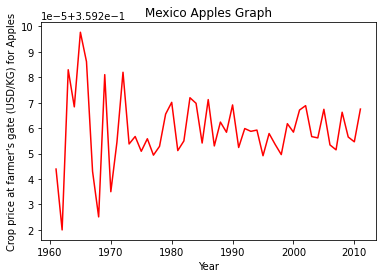

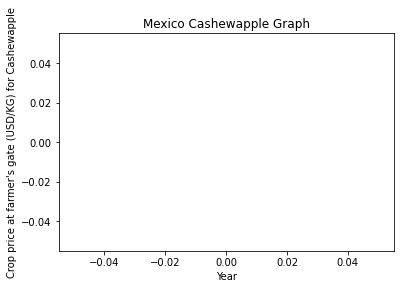

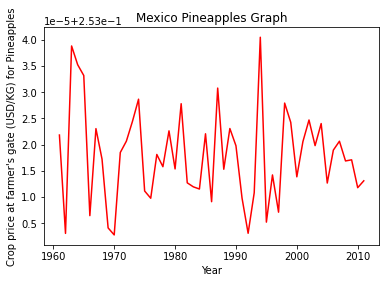

In [69]:
search=str(input())
coID=122
gCount=0
for i in range(169):
  cropID=i
  cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
  testSplit=cropName.split("[")
  cropName=testSplit[2].split("]")[0]
  cropName=cropName.replace("'","")
  coName=str(data['FAOSTAT_CoName_FAO'][coID])
  testSplitCo=coName.split("[")
  coName=testSplitCo[2].split("]")[0]
  coName=coName.replace("'","")
  #print(cropName)
  if search.upper() in cropName.upper():
    gCount+=1
    y=data['Pr_Crop_US'][122][cropID]
    #print(len(stuff['Pr_Crop_US'][0][0]))
    x=np.arange(1961,2016)
    plt.figure(i)
    plt.title(coName+ " "+cropName+ " Graph")
    plt.xlabel("Year")
    plt.ylabel("Crop price at farmer's gate (USD/KG) for " + cropName)
    plt.plot(x,y,color="red")
    plt.show

In [70]:
print("total number of graphs " + str(gCount))

total number of graphs 3


The crop price starts to stabalize around the time that nafta was enacted (1994)

Index for US: 206
Index for Mexico: 122
Index for Canada: 33

apple


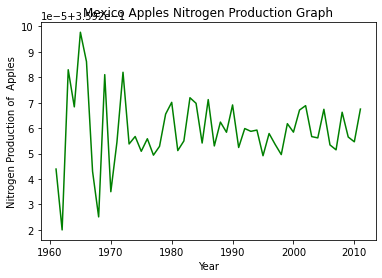

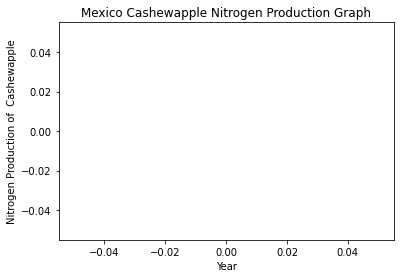

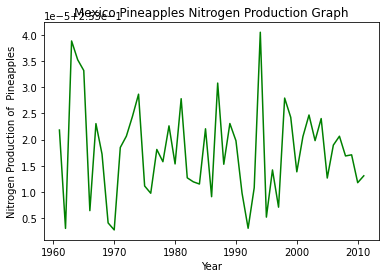

In [71]:
search=str(input())
coID=122
gCount=0
for i in range(len(data['Pr_Crop_US'][coID])):
  cropID=i
  cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
  testSplit=cropName.split("[")
  cropName=testSplit[2].split("]")[0]
  cropName=cropName.replace("'","")
  coName=str(data['FAOSTAT_CoName_FAO'][coID])
  testSplitCo=coName.split("[")
  coName=testSplitCo[2].split("]")[0]
  coName=coName.replace("'","")
  #print(cropName)
  if search.upper() in cropName.upper():
  #if 1:
    gCount+=1
    y=data['Pr_Crop_US'][coID][cropID]
    #print(len(stuff['Pr_Crop_US'][0][0]))
    x=np.arange(1961,2016)
    plt.figure(i)
    plt.title(coName+ " "+cropName+ " Nitrogen Production Graph")
    plt.xlabel("Year")
    plt.ylabel("Nitrogen Production of  " + cropName)
    plt.plot(x,y,color="green")
    plt.show

apple


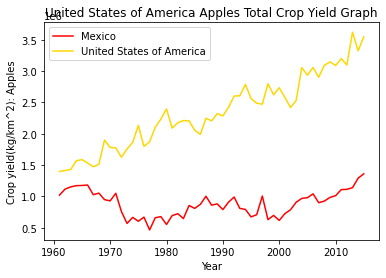

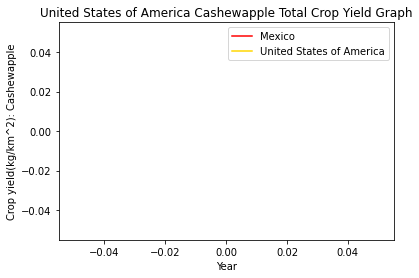

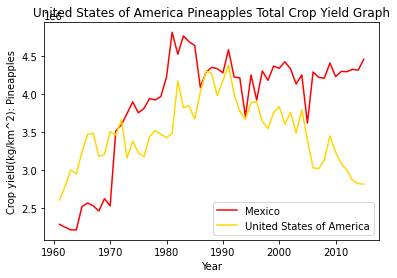

In [72]:
search=str(input())
countriesID=[122,206]
colors=['red','gold']
gCount=0
counter=0
for j in countriesID:
  coID=j
  counter+=1
  for i in range(len(data['Pr_Crop_US'][coID])):
    cropID=i
    cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
    testSplit=cropName.split("[")
    cropName=testSplit[2].split("]")[0]
    cropName=cropName.replace("'","")
    coName=str(data['FAOSTAT_CoName_FAO'][coID])
    testSplitCo=coName.split("[")
    coName=testSplitCo[2].split("]")[0]
    coName=coName.replace("'","")
    #print(cropName)
    if search.upper() in cropName.upper():
    #if 1:
      gCount+=1
      y=data['Yield_FAO'][coID][cropID]
      #print(len(stuff['Pr_Crop_US'][0][0]))
      x=np.arange(1961,2016)
      plt.figure(i)
      plt.title(coName+ " "+cropName+ " Total Crop Yield Graph")
      plt.xlabel("Year")
      plt.ylabel("Crop yield(kg/km^2): " + cropName)
      plt.plot(x,y,color=colors[counter-1],label=coName)
      plt.legend()
      plt.show

apple


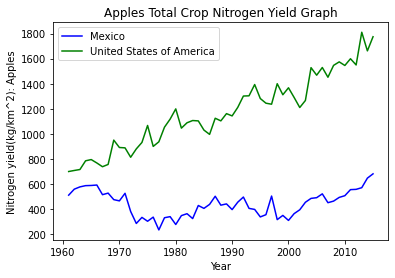

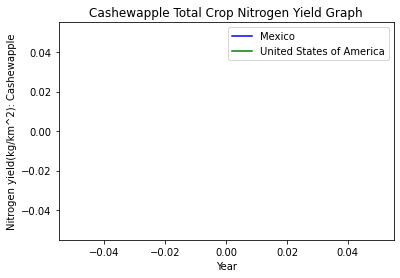

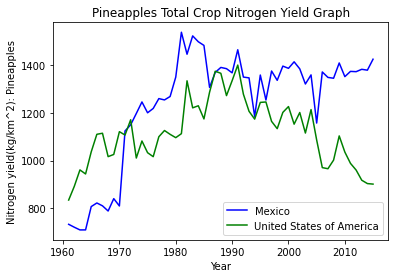

In [73]:
search=str(input())
countriesID=[122,206]
colors=['blue','green']
gCount=0
counter=0
for j in countriesID:
  coID=j
  counter+=1
  for i in range(len(data['Nyield_kgkm'][coID])):
    cropID=i
    cropName=str(data['FAOSTAT_CrName_FAO'][cropID])
    testSplit=cropName.split("[")
    cropName=testSplit[2].split("]")[0]
    cropName=cropName.replace("'","")
    coName=str(data['FAOSTAT_CoName_FAO'][coID])
    testSplitCo=coName.split("[")
    coName=testSplitCo[2].split("]")[0]
    coName=coName.replace("'","")
    #print(cropName)
    if search.upper() in cropName.upper():
    #if 1:
      gCount+=1
      y=data['Nyield_kgkm'][coID][cropID]
      #print(len(stuff['Pr_Crop_US'][0][0]))
      x=np.arange(1961,2016)
      plt.figure(i)
      plt.title(cropName+ " Total Crop Nitrogen Yield Graph")
      plt.xlabel("Year")
      plt.ylabel("Nitrogen yield(kg/km^2): " + cropName)
      plt.plot(x,y,color=colors[counter-1],label=coName)
      plt.legend()
      plt.show

55


<function matplotlib.pyplot.show>

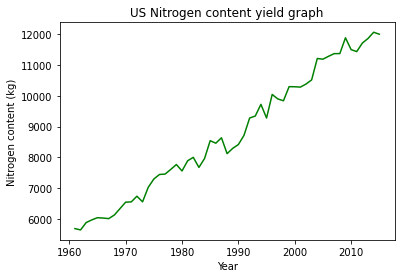

In [74]:
y=data['Nyield_kgkm'][206][124]
print(len(data['Pr_Crop_US'][0][1]))
x=np.arange(1961,2016)
plt.title("US Nitrogen content yield graph")
plt.xlabel("Year")
plt.ylabel("Nitrogen content (kg)")
plt.plot(x,y,color="green")
plt.show

US Export Mexico Import:

In [75]:
withoutArr=[]
aggArr=[]

In [76]:
USEXP=[83, 142,166, 133, 3]
cropNames=["Maize", "Soybeans", "Wheat", "Rice/paddy", "Apples"]
countryCo=206
impCo=122
#Nitrogen Lost

nitrogenLostMex=[]
for year in range(55):
  topLost=0
  bottomLost=0
  #for i in USEXP:
  for i in range(170):
    if data['Nexc_kgkm'][countryCo][i][year]==data['Nexc_kgkm'][countryCo][i][year] and data['AreaH_FAO'][countryCo][i][year]==data['AreaH_FAO'][countryCo][i][year]: 
      topLost+=float(data['Nexc_kgkm'][countryCo][i][year])*float(data['AreaH_FAO'][countryCo][i][year])
      bottomLost+=float(data['AreaH_FAO'][countryCo][i][year])
  nitrogenLostMex.append(float(topLost/bottomLost))
print("Total Nitrogen Lost: " + str(round(float(topLost/bottomLost),3))+ " kilograms of nitrogen")
#Nitrogen Use Efficiency
NUEMex=[]
for year in range(55):
  topNUE=0
  bottomNUE=0
  #for i in USEXP:
  for i in range(170):
    if data['Nyield_kgkm'][countryCo][i][year] == data['Nyield_kgkm'][countryCo][i][year] and data['AreaH_FAO'][countryCo][i][year]==data['AreaH_FAO'][countryCo][i][year] and data['Nfer_kgkm'][countryCo][i][year]==data['Nfer_kgkm'][countryCo][i][year] and data['Nman_kgkm'][countryCo][i][year]==data['Nman_kgkm'][countryCo][i][year] and data['Nfix_kgkm'][countryCo][i][year]==data['Nfix_kgkm'][countryCo][i][year] and data['Ndep_kgkm'][countryCo][i][year]==data['Ndep_kgkm'][countryCo][i][year] and data['AreaH_FAO'][countryCo][i][year]==data['AreaH_FAO'][countryCo][i][year]:
      topNUE+=float(data['Nyield_kgkm'][countryCo][i][year])*float(data['AreaH_FAO'][countryCo][i][year])
      bottomNUE+=(float(data['Nfer_kgkm'][countryCo][i][year])+float(data['Nman_kgkm'][countryCo][i][year])+float(data['Nfix_kgkm'][countryCo][i][year])+float(data['Ndep_kgkm'][countryCo][i][year]))*float(data['AreaH_FAO'][countryCo][i][year])
  NUEMex.append(float(topNUE/bottomNUE*100))
print("Nitrogen Use Efficiency: "+str(round(float(topNUE/bottomNUE*100),3))+"%")
#Nitrogen imported
aggNetMex=[]
for year in range(30):
  c=0
  agg=0#aggregate net nitrogen input to Mexico from US
  #for i in USEXP:
  for i in range(170):
    if data['NC_Bou'][0][i]==data['NC_Bou'][0][i] and data['netImTrade'][i][year][impCo][countryCo]==data['netImTrade'][i][year][impCo][countryCo]:
      impNet=data['NC_Bou'][0][i]*data['netImTrade'][i][year][impCo][countryCo]#year limited to year
      #print("Nitrogen imported for " + cropNames[c]+ ": "+str(impNet))
      c+=1
      agg+=impNet
  aggNetMex.append(agg)
print("Aggregate net nitrogen input to Mexico from US: "+ str(round(agg,3)) +" kilograms of nitrogen")
aggArr.append(round(agg,3))
nitSurpMex=[]
for year in range(30):
  nitSurp=0
  #for i in USEXP:
  for i in range(170):
    if data['netImTrade'][i][year][impCo][countryCo]==data['netImTrade'][i][year][impCo][countryCo]:
      temp=data['netImTrade'][i][year][impCo][countryCo]*((1/float(topNUE/bottomNUE))-1)
      nitSurp+=temp
  nitSurpMex.append(nitSurp)
print("Aggregate nitrogen produced without trade for mexico: "+str(round(nitSurp,3)) +" kilograms of nitrogen")
withoutArr.append(round(nitSurp,3))

Total Nitrogen Lost: 8548.693 kilograms of nitrogen
Nitrogen Use Efficiency: 61.719%
Aggregate net nitrogen input to Mexico from US: 571776576.185 kilograms of nitrogen
Aggregate nitrogen produced without trade for mexico: 13125972071.015 kilograms of nitrogen


In [77]:
print(len(nitrogenLostMex))

55


<function matplotlib.pyplot.show>

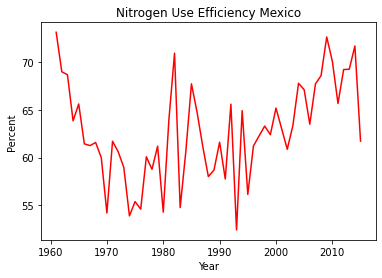

In [78]:
y=NUEMex
x=np.arange(1961,2016)
plt.title("Nitrogen Use Efficiency Mexico")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.plot(x,y,color="red")
plt.show

<function matplotlib.pyplot.show>

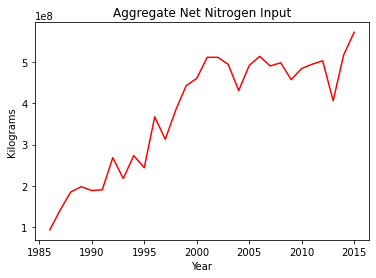

In [79]:
y=aggNetMex
x=np.arange(1986,2016)
plt.title("Aggregate Net Nitrogen Input")
plt.xlabel("Year")
plt.ylabel("Kilograms")
plt.plot(x,y,color="red")
plt.show

Mexico Export US Import:

In [80]:
USEXP=[11, 158,35, 8, 47]
cropNames=["Barley", "Tomatoes", "Green Chiles and Peppers", "Avocado", "Cucumbers and Gherkins"]
countryCo=122
impCo=206
nitrogenLostUS=[]
#Nitrogen Lost
for year in range(55):
  topLost=0
  bottomLost=0
  #for i in USEXP:
  for i in range(170):
    if data['Nexc_kgkm'][countryCo][i][year]==data['Nexc_kgkm'][countryCo][i][year] and data['AreaH_FAO'][countryCo][i][year]==data['AreaH_FAO'][countryCo][i][year]: 
      topLost+=float(data['Nexc_kgkm'][countryCo][i][year])*float(data['AreaH_FAO'][countryCo][i][year])
      bottomLost+=float(data['AreaH_FAO'][countryCo][i][year])
  nitrogenLostUS.append(float(topLost/bottomLost))
print("Total Nitrogen Lost: " + str(round(float(topLost/bottomLost),3))+ " kilograms of nitrogen")
#Nitrogen Use Efficiency
NUEUS=[]
for year in range(55):
  topNUE=0
  bottomNUE=0
  #for i in USEXP:
  for i in range(170):
    if data['Nyield_kgkm'][countryCo][i][year] == data['Nyield_kgkm'][countryCo][i][year] and data['AreaH_FAO'][countryCo][i][year]==data['AreaH_FAO'][countryCo][i][year] and data['Nfer_kgkm'][countryCo][i][year]==data['Nfer_kgkm'][countryCo][i][year] and data['Nman_kgkm'][countryCo][i][year]==data['Nman_kgkm'][countryCo][i][year] and data['Nfix_kgkm'][countryCo][i][year]==data['Nfix_kgkm'][countryCo][i][year] and data['Ndep_kgkm'][countryCo][i][year]==data['Ndep_kgkm'][countryCo][i][year] and data['AreaH_FAO'][countryCo][i][year]==data['AreaH_FAO'][countryCo][i][year]:
      topNUE+=float(data['Nyield_kgkm'][countryCo][i][year])*float(data['AreaH_FAO'][countryCo][i][year])
      bottomNUE+=(float(data['Nfer_kgkm'][countryCo][i][year])+float(data['Nman_kgkm'][countryCo][i][year])+float(data['Nfix_kgkm'][countryCo][i][year])+float(data['Ndep_kgkm'][countryCo][i][year]))*float(data['AreaH_FAO'][countryCo][i][year])
  NUEUS.append(float(topNUE/bottomNUE*100))
print("Nitrogen Use Efficiency: "+str(round(float(topNUE/bottomNUE*100),3))+"%")
aggNetUS=[]
for year in range(30):
#Nitrogen imported
  c=0
  agg=0#aggregate net nitrogen input to US from Mexico
  #for i in USEXP:
  for i in range(170):
    if data['NC_Bou'][0][i]==data['NC_Bou'][0][i] and data['netImTrade'][i][year][impCo][countryCo]==data['netImTrade'][i][year][impCo][countryCo]:
      impNet=data['NC_Bou'][0][i]*data['netImTrade'][i][year][impCo][countryCo]#year limited to year
      #print("Nitrogen imported for " + cropNames[c]+ ": "+str(impNet))
      c+=1
      agg+=impNet
  aggNetUS.append(agg)
print("Aggregate net nitrogen input to US from Mexico: "+ str(round(agg,3)) +" kilograms of nitrogen")
aggArr.append(round(agg,3))
aggNitProdUS=[]
for year in range(30):
  nitSurp=0
  for i in range(170):
  #for i in USEXP:
    if data['netImTrade'][i][year][impCo][countryCo]==data['netImTrade'][i][year][impCo][countryCo]:
      temp=data['netImTrade'][i][year][impCo][countryCo]*((1/float(topNUE/bottomNUE))-1)
      nitSurp+=temp
  aggNitProdUS.append(nitSurp)
print("Aggregate nitrogen produced without trade for US: "+str(round(nitSurp,3)) +" kilograms of nitrogen")
withoutArr.append(round(nitSurp,3))

Total Nitrogen Lost: 9754.477 kilograms of nitrogen
Nitrogen Use Efficiency: 32.148%
Aggregate net nitrogen input to US from Mexico: 184572704.607 kilograms of nitrogen
Aggregate nitrogen produced without trade for US: 40124438616.903 kilograms of nitrogen


In [81]:
print(len(withoutArr))

2


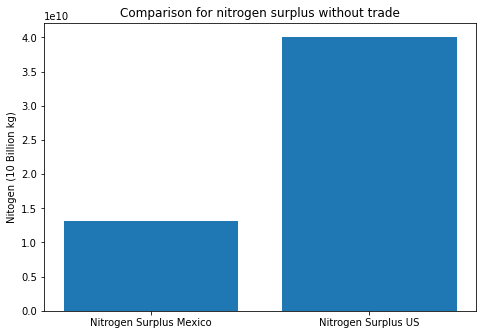

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tags = ['Nitrogen Surplus Mexico', 'Nitrogen Surplus US']
ax.bar(tags,withoutArr)
ax.set_ylabel('Nitogen (10 Billion kg)')
ax.set_title('Comparison for nitrogen surplus without trade')
plt.show()

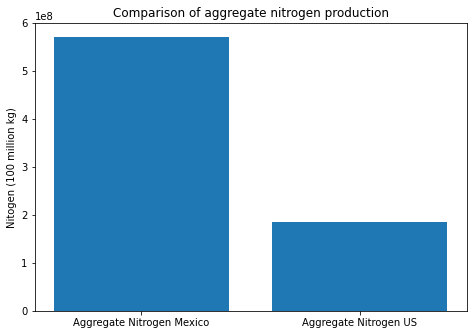

In [83]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tags = ['Aggregate Nitrogen Mexico', 'Aggregate Nitrogen US']
ax.bar(tags,aggArr)
ax.set_ylabel('Nitogen (100 million kg)')
ax.set_title('Comparison of aggregate nitrogen production')
plt.show()

In [84]:
print(nitSurpMex)
print(aggNitProdUS)

[2002615042.0980396, 3651795872.2506013, 4617121180.8177595, 5245077255.072104, 5363630346.526297, 4367169968.881008, 6066052927.215142, 4810033225.571966, 6369775993.9970665, 5260583428.544823, 8640572713.354614, 6238185261.165394, 8988310632.46724, 10328240741.811882, 10935817047.411814, 11936946746.753326, 11480505580.276594, 10941574366.682518, 10103970431.702242, 10835895010.047544, 11498704803.888912, 11069677452.453857, 11753834966.489021, 10530848263.025925, 11266540398.811905, 11934677495.387135, 11734521108.067501, 9532947850.873798, 11906581705.29709, 13125972071.014551]
[5870029253.325825, 7760228688.760992, 7260529212.905705, 6683353587.555406, 4681926944.219879, 6990905220.424603, 5545916333.795375, 6841873818.834375, 6702854712.938468, 9210069621.175438, 9569880651.073069, 11966108360.039255, 14356300135.635805, 16118228316.529612, 16613607696.149233, 17274665190.427193, 19138337537.844444, 19966095007.012096, 20647178064.608536, 22502152504.228737, 25811740182.644905, 2

<function matplotlib.pyplot.show>

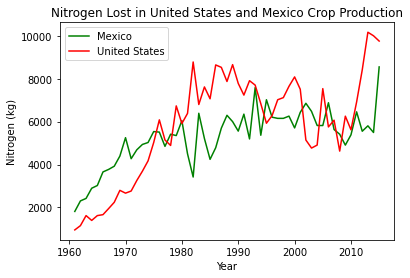

In [85]:
y=nitrogenLostMex
x=np.arange(1961,2016)
plt.title("Nitrogen Lost in Mexican Crop Production")
plt.xlabel("Year")
plt.ylabel("Nitrogen (kg)")
plt.plot(x,y,color="green", label='Mexico')
plt.show
y=nitrogenLostUS
x=np.arange(1961,2016)
plt.title("Nitrogen Lost in United States and Mexico Crop Production")
plt.xlabel("Year")
plt.ylabel("Nitrogen (kg)")
plt.plot(x,y,color="red",label='United States')
plt.legend(['Mexico', 'United States'])
plt.show

<function matplotlib.pyplot.show>

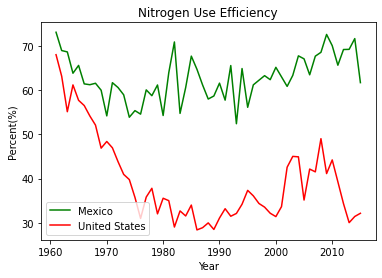

In [86]:
y=NUEMex
x=np.arange(1961,2016)
plt.plot(x,y,color="green", label='Mexico')
plt.show
y=NUEUS
x=np.arange(1961,2016)
plt.title("Nitrogen Use Efficiency")
plt.xlabel("Year")
plt.ylabel("Percent(%)")
plt.plot(x,y,color="red",label='United States')
plt.legend(['Mexico', 'United States'])
plt.show

<function matplotlib.pyplot.show>

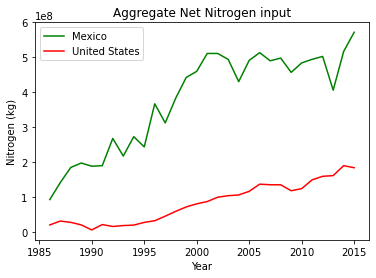

In [87]:
y=aggNetMex
x=np.arange(1986,2016)
plt.plot(x,y,color="green", label='Mexico')
y=aggNetUS
x=np.arange(1986,2016)
plt.title("Aggregate Net Nitrogen input")
plt.xlabel("Year")
plt.ylabel("Nitrogen (kg)")
plt.plot(x,y,color="red",label='United States')
plt.legend(['Mexico', 'United States'])
plt.show

<function matplotlib.pyplot.show>

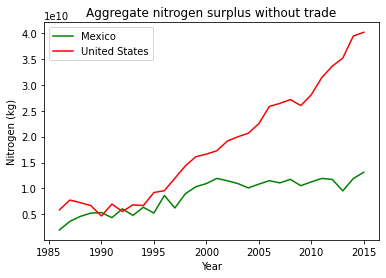

In [88]:
y=nitSurpMex
x=np.arange(1986,2016)
plt.plot(x,y,color="green", label='Mexico')
y=aggNitProdUS
x=np.arange(1986,2016)
plt.title("Aggregate nitrogen surplus without trade")
plt.xlabel("Year")
plt.ylabel("Nitrogen (kg)")
plt.plot(x,y,color="red",label='United States')
plt.legend(['Mexico', 'United States'])
plt.show

In [89]:
#print(nitSurpMex)

In [90]:
#for i in range(170):
  #print(data['FAOSTAT_CrName_FAO'][i])
  #print("Index" +str(i))

In [91]:
#for i in range(209):
  #print(data['FAOSTAT_CoName_FAO'][i])
  #print("Index" +str(i))